Link to Medium blog post: https://medium.com/analytics-vidhya/stop-one-hot-encoding-your-categorical-variables-bbb0fba89809

# Stop One-Hot Encoding Your Categorical Variables.

One-hot encoding, otherwise known as dummy variables, is a method of converting categorical variables into several binary columns, where a 1 indicates the presence of that row belonging to that category.

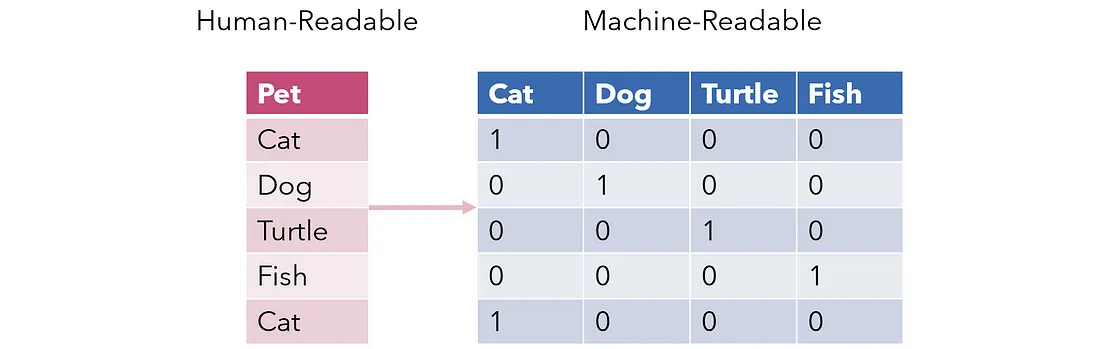

It is, pretty obviously, not a great a choice for the encoding of categorical variables from a machine learning perspective.

Most apparent is the heavy amount of dimensionality it adds, and it is common knowledge that generally a lower amount of dimensions is better. For example, if we were to have a column representing a US state (e.g. California, New York), a one-hot encoding scheme would result in fifty additional dimensions.

Not only does it add a massive number of dimensions to the dataset, there really isn’t much information — ones occasionally dotting a sea of zeroes. This results in an exceptionally sparse landscape, which makes it hard to grapple with optimization. This is especially true with neural networks, whose optimizers have enough trouble navigating the error space without dozens of empty dimensions.

Worse, each of the information-sparse columns have a linear relationship with each other. This means that one variable can be easily predicted using the others, can causes problems of parallelism and multicollinearity in high dimensions.

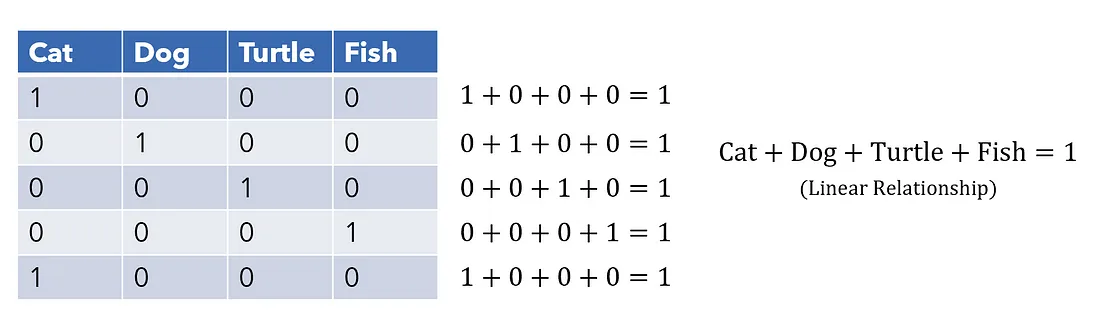

The optimal dataset consists of features whose information is independently valuable, and one-hot encoding creates an environment of anything but that.

Granted, if there are only three or perhaps even four classes, one-hot encoding may not be that bad a choice, but chances are it’s worth exploring the alternatives, depending on the relative size of the dataset.

Target encoding is a very effective way to represent a categorical column and only takes up the space of one feature. Also known as mean encoding, each value in the column is replaced with the mean target value for that category. This allows for a more direct representation of the relationship between the categorical variable and the target variable, and is a tremendously popular technique (especially on Kaggle competitions).

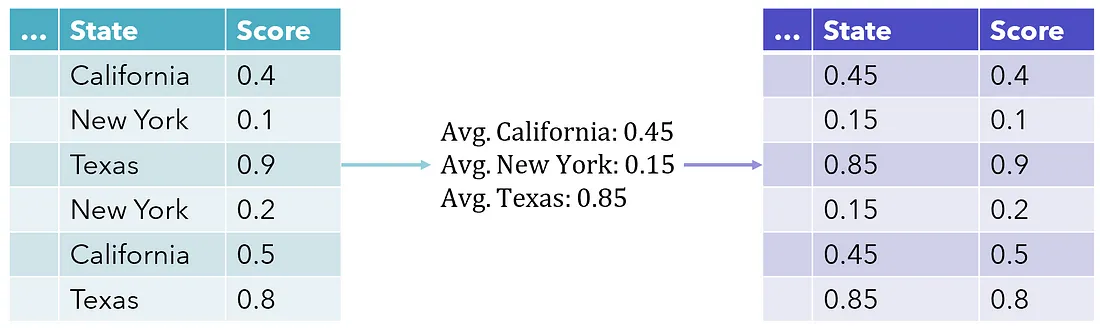

This method of encoding has some downsides. For one, it makes it more difficult for the model to learn relationships between a mean-encoded variable and another variable, It draws similarity in a column based only on its relationship with the target, which may either be a pro or a con.

Primarily, however, this method of encoding can be very sensitive to the y-variable, which affects the model’s ability to extract the encoded information.

Since every one of the category’s values is replaced with the same numerical value, the model may tend to overfit to the encoded values it has seen (e.g. associating 0.8 with something entirely different than 0.79). This is an effect of treating values on a continuous scale as heavily repeated classes.

Hence, the y-variable needs to be carefully monitored for things like outliers.

To implement this, use the category_encoders library. Since the target encoder is a supervised method, it requires both X and y training sets.



In [ ]:
from category_encoders import TargetEncoder
enc = TargetEncoder(cols=['Name_of_col','Another_name'])
training_set = enc.fit_transform(X_train, y_train)

Leave-one-out encoding attempts to remedy such a reliance on the y-variable and more diversity in terms of value by calculating the average, excluding the current row value. This levels off the effect of outliers and creates more diverse encoded values.

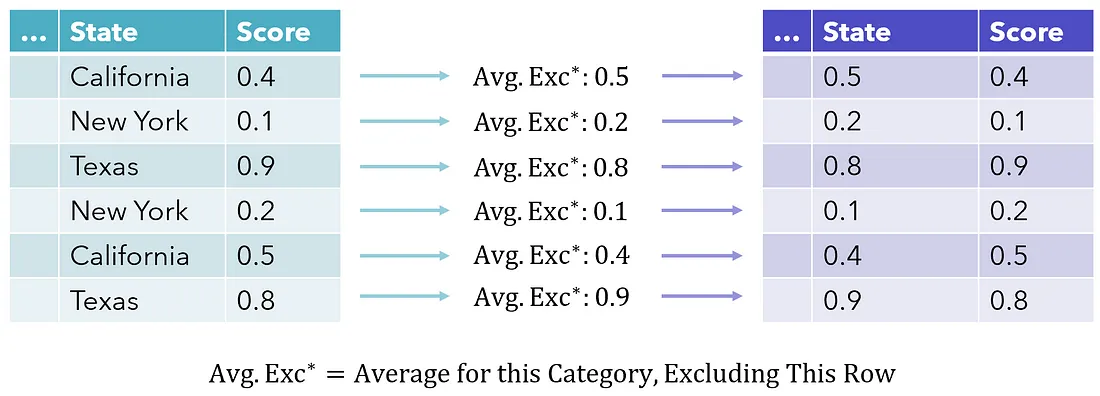

Since the model is exposed to not only the same value for each encoded class but a range, it learns to better generalize.

Implementation can be performed, as usual, in the category_encoders library, using the LeaveOneOutEncoder.

In [ ]:
from category_encoders import LeaveOneOutEncoder
enc = LeaveOneOutEncoder(cols=['Name_of_col','Another_name'])
training_set = enc.fit_transform(X_train, y_train)

Another strategy towards achieving a similar effect is adding normally distributed noise to the encoded scores, where the standard deviation is a parameter that can be tuned.

Bayesian Target Encoding is a more mathematically involved approach towards using the target as an encoding method. Using only the mean can be a deceiving metric, so Bayesian target encoding seeks to incorporate other statistical measures of the target variable’s distribution, such as its variance or its skewness — referred to as ‘higher moments’.

These attributes of the distribution are then incorporated through a Bayesian model, which is able to produce an encoding that is more aware of various aspects of the category’s target distribution. The result, however, is less interpretable.

Weight of Evidence is another nuanced view towards the relationship between a categorical independent variable and a dependent variable. WoE evolved from the credit scoring world, and was used to measure the separation between customers who defaulted or paid back on a loan. The mathematical definition of Weight of Evidence is the natural log of the odds ratio, or:

In [ ]:
ln (% of non events / % of events)

The higher the WoE, the more likely an event will occur. ‘Non-events’ would be the percent of those not in a certain class. Using Weight of Evidence establishes a monotonic (never stops going in one direction) relationship with the dependent variable and secures categories on a logistic scale, natural for logistic regression. WoE is a key component in another metric, Information Value, which measures how information a feature provides for prediction.

In [ ]:
from category_encoders import WOEEncoder
enc = WOEEncoder(cols=['Name_of_col','Another_name'])
training_set = enc.fit_transform(X_train, y_train)

These methods are supervised encoders, or methods of encoding that consider the target variable and hence are usually more effective encoders in the task of prediction. However, this is not necessarily the case when unsupervised analysis needs to be performed.

Nonlinear PCA is a method of approaching PCA that can handle categorical variables by using categorical quantization. This finds the best numerical values for categories such that the performance (explained variance) of the regular PCA is maximized.